In [2]:
# Downgrade numpy to a compatible version (<2.0) to avoid ImportError issues
%pip install numpy<2.0
import numpy as np

Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


C:\Users\HP\AppData\Local\Temp\ipykernel_48172\39592446.py:22: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_path)


(1056660, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   cord_uid          1056660 non-null  object 
 1   sha               373766 non-null   object 
 2   source_x          1056660 non-null  object 
 3   title             1056157 non-null  object 
 4   doi               656780 non-null   object 
 5   pmcid             389571 non-null   object 
 6   pubmed_id         498932 non-null   object 
 7   license           1056660 non-null  object 
 8   abstract          821116 non-null   object 
 9   publish_time      1054846 non-null  object 
 10  authors           1032791 non-null  object 
 11  journal           969338 non-null   object 
 12  mag_id            0 non-null        float64
 13  who_covidence_id  482935 non-null   object 
 14  arxiv_id          14249 non-null    object 
 15  pdf_json_files    373766 non-null  

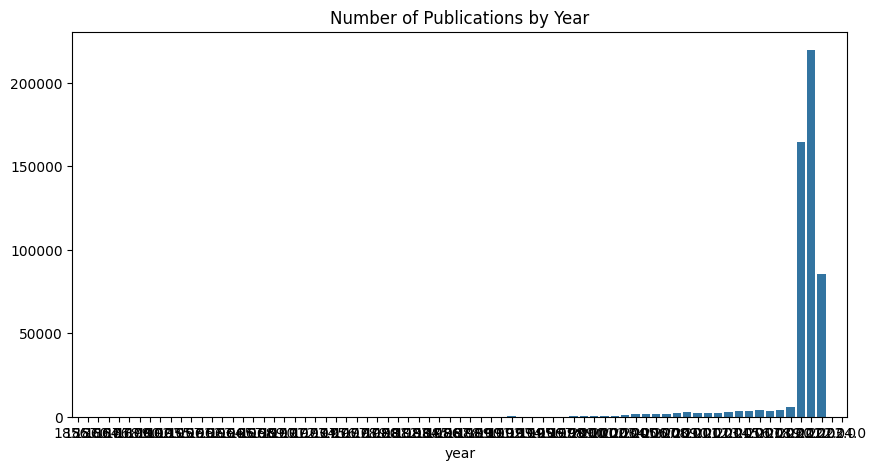

In [4]:
# Step 1: Install and setup Kaggle API in Colab
%pip install kaggle
%pip install matplotlib
%pip install seaborn
# Upload Kaggle API key (download kaggle.json from your Kaggle account settings)
# from google.colab import files
# files.upload()   # upload kaggle.json

# Move kaggle.json to the right place
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# Step 2: Download ONLY metadata.csv (560MB)
# !kaggle datasets download -d allen-institute-for-ai/CORD-19-research-challenge --unzip -f metadata.csv

# Step 3: Load the data
import pandas as pd

# Update the path to metadata.csv
csv_path = r"c:\Desktop\PLPAcademy\plp-coursework\Python\frameworks\metadata.csv"
df = pd.read_csv(csv_path)
print(df.shape)
print(df.info())
df.head()

# Step 4: Basic cleaning
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year
df['abstract_word_count'] = df['abstract'].fillna("").apply(lambda x: len(x.split()))

# Step 5: Basic analysis
print("Papers by year:")
print(df['year'].value_counts().sort_index())

print("\nTop 10 journals:")
print(df['journal'].value_counts().head(10))

# Step 6: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Publications per year
year_counts = df['year'].value_counts().sort_index()
plt.figure(figsize=(10,5))
sns.barplot(x=year_counts.index, y=year_counts.values)
plt.title("Number of Publications by Year")
plt.show()